In [141]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import datetime
from cmcrameri import cm
os.chdir('/users/marianne/documents/pyrodiversity')

In [74]:
swe = pd.read_csv('data/bhv_swe.csv')
swe.columns = ['date_pdt','swe_in','flag']
swe.swe_in = swe.swe_in.astype('float')
tmp = [datetime.datetime.strptime(t, '%m/%d/%Y') for t in swe.date_pdt]
swe['dt'] = tmp
dp = pd.read_csv('data/bhv_dp.csv')
dp.columns = ['date_pdt','dp_in','flag']
dp.dp_in = dp.dp_in.astype('float')
tmp = [datetime.datetime.strptime(t, '%m/%d/%Y') for t in dp.date_pdt]
dp['dt'] = tmp
bhv_snow = swe.merge(dp,on='dt')
tmp = [d.month for d in bhv_snow.dt]
bhv_snow['month'] = tmp
tmp = [d.year for d in bhv_snow.dt]
bhv_snow['year'] = tmp
tmp = [d.day for d in bhv_snow.dt]
bhv_snow['day'] = tmp
tmp = [bhv_snow.swe_in[i]/bhv_snow.dp_in[i] for i in range(len(bhv_snow))]
bhv_snow['rel_dens'] = tmp

/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_44279/4007589170.py:18: RuntimeWarning: invalid value encountered in double_scalars
  tmp = [bhv_snow.swe_in[i]/bhv_snow.dp_in[i] for i in range(len(bhv_snow))]
/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_44279/4007589170.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmp = [bhv_snow.swe_in[i]/bhv_snow.dp_in[i] for i in range(len(bhv_snow))]


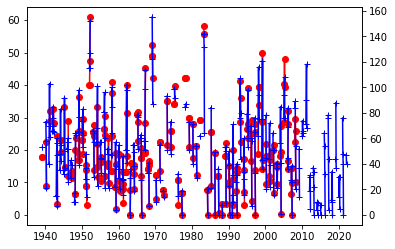

In [33]:
fig,ax=plt.subplots()
ax2 = ax.twinx()
ax.plot(swe.dt,swe.swe_in,color='red',marker= 'o')
ax2.plot(dp.dt,dp.dp_in,color='blue',marker = '+')
plt.show()

Text(0, 0.5, 'depth')

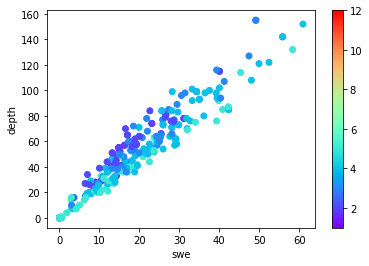

In [54]:
plt.scatter(bhv_snow.swe_in,bhv_snow.dp_in,c= bhv_snow.month,cmap='rainbow')
plt.colorbar()
plt.xlabel('swe')
plt.ylabel('depth')


/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_44279/1587436352.py:1: RuntimeWarning: invalid value encountered in double_scalars
  tmp = [bhv_snow.swe_in[i]/bhv_snow.dp_in[i] for i in range(len(bhv_snow))]
/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_44279/1587436352.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  tmp = [bhv_snow.swe_in[i]/bhv_snow.dp_in[i] for i in range(len(bhv_snow))]


Text(0, 0.5, 'relative snow density')

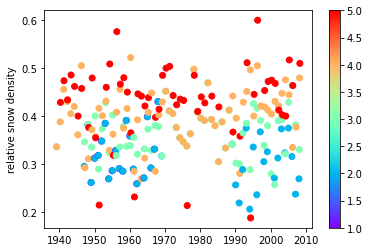

In [64]:
plt.scatter(bhv_snow.dt,bhv_snow.rel_dens,c= bhv_snow.month,cmap='rainbow')
plt.colorbar()
plt.ylabel('relative snow density')
## the adjusted swe is not updated for recent years so not included here
## what's the difference between adj swe and original swe?
## probably trust adj more than 
## THEY ONLY TAKE SNOW COURSES IN THE SPRING (JAN - MAY), confirming snow is denser later in the season, good to see the pattern

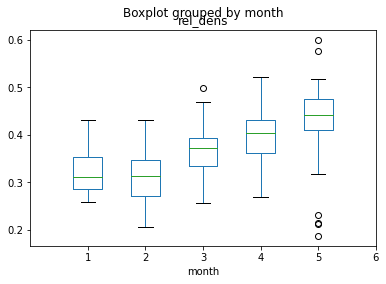

In [73]:
# # grouped =  # ['2013-08-17'].groupby(axis=1, level='SPECIES')
fig,ax=plt.subplots()
bhv_snow.boxplot(column='rel_dens', by='month',ax=ax)
ax.set_xlim([0,6])
ax.grid(False)
plt.show()

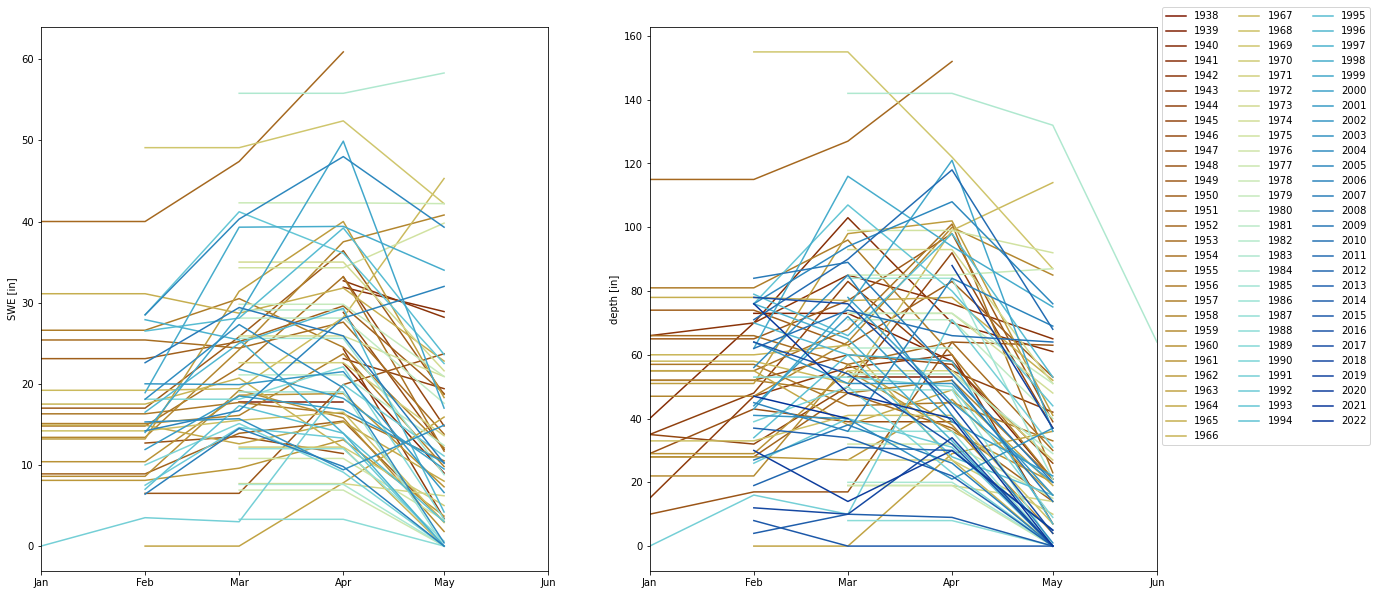

In [181]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
from matplotlib import dates
yrs = np.unique(bhv_snow.year)
for i, val in enumerate(cm.roma(np.linspace(0,1,len(yrs)))):
    yr = yrs[i]
    data = bhv_snow.loc[bhv_snow.year == yr]
    try:
        ytime = [datetime.datetime(month = data.month[i], day = data.day[i], year = 1000) for i in data.index]
        ax[0].plot(ytime,data.swe_in,color=val,label=yr)
        ax[1].plot(ytime,data.dp_in,color=val,label=yr)
    except:
        continue
ax[1].legend(ncol=3,bbox_to_anchor=(1.0, 0.222))
start = datetime.datetime(day=1,month=1,year=1000)
end = datetime.datetime(day=1,month=6,year=1000)
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax[0].set_xlim(start,end)
ax[1].set_xlim(start,end)
ax[0].set_ylabel('SWE [in]')
ax[1].set_ylabel('depth [in]')


plt.show()

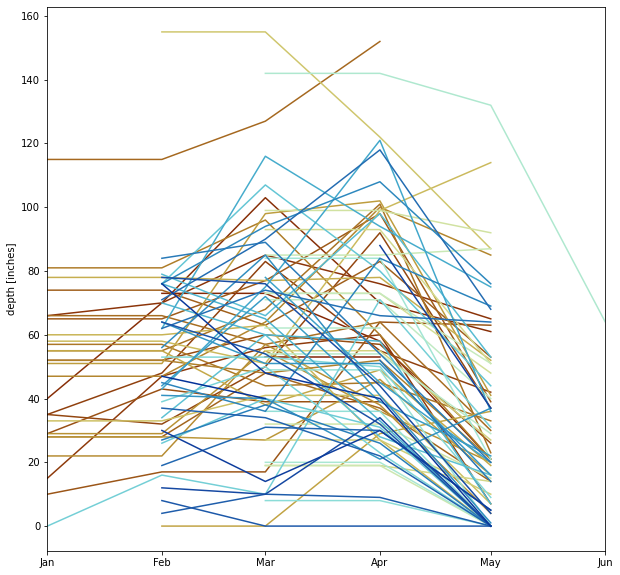

In [153]:
fig,ax=plt.subplots(figsize=(10,10))
from matplotlib import dates
yrs = np.unique(bhv_snow.year)
for i, val in enumerate(cm.roma(np.linspace(0,1,len(yrs)))):
    yr = yrs[i]
    data = bhv_snow.loc[bhv_snow.year == yr]
    try:
        ytime = [datetime.datetime(month = data.month[i], day = data.day[i], year = 1000) for i in data.index]
        ax.plot(ytime,data.dp_in,color=val,label=yr)
    except:
        continue
# ax.legend(ncol=3,bbox_to_anchor=(1.1, 1.05))
start = datetime.datetime(day=1,month=1,year=1000)
end = datetime.datetime(day=1,month=6,year=1000)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.set_xlim(start,end)
ax.set_ylabel('depth [inches]')

plt.show()

[datetime.datetime(1000, 1, 1, 0, 0),
 datetime.datetime(1000, 2, 1, 0, 0),
 datetime.datetime(1000, 3, 1, 0, 0)]

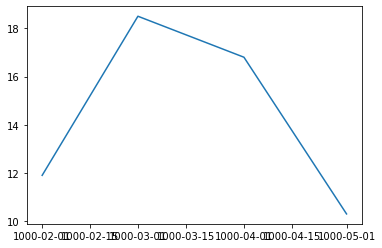

In [133]:
fig,ax=plt.subplots()
yr = 2001
data = bhv_snow.loc[bhv_snow.year == yr]
ytime = [datetime.datetime(month = data.month[i], day = data.day[i], year = 1000) for i in data.index]
ax.plot(ytime,data.swe_in)

In [132]:
ytime

[datetime.datetime(1000, 11, 1, 0, 0), datetime.datetime(1000, 12, 1, 0, 0)]

In [110]:
ytime = [datetime.datetime(month = data.month[i], day = data.day[i], year = 1000) for i in range(len(data))]


In [124]:
bhv_snow

,date_pdt_x,swe_in,flag_x,dt,date_pdt_y,dp_in,flag_y,month,year,day,rel_dens
0,11/01/1938,NaN,NaN,1938-11-01,11/01/1938,NaN,NaN,11,1938,1,NaN
1,12/01/1938,NaN,NaN,1938-12-01,12/01/1938,NaN,NaN,12,1938,1,NaN
2,01/01/1939,NaN,NaN,1939-01-01,01/01/1939,NaN,NaN,1,1939,1,NaN
3,02/01/1939,NaN,NaN,1939-02-01,02/01/1939,NaN,NaN,2,1939,1,NaN
4,03/01/1939,17.8,NaN,1939-03-01,03/01/1939,53.0,NaN,3,1939,1,0.335849
...,...,...,...,...,...,...,...,...,...,...,...
996,11/01/2021,NaN,NaN,2021-11-01,11/01/2021,NaN,NaN,11,2021,1,NaN
997,12/01/2021,NaN,NaN,2021-12-01,12/01/2021,NaN,NaN,12,2021,1,NaN
998,01/01/2022,NaN,NaN,2022-01-01,01/01/2022,NaN,NaN,1,2022,1,NaN
999,02/01/2022,NaN,NaN,2022-02-01,02/01/2022,47.0,NaN,2,2022,1,NaN


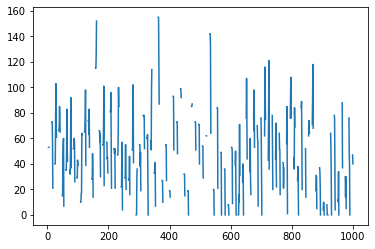

In [63]:
bhv_snow

,date_pdt_x,swe_in,flag_x,dt,date_pdt_y,dp_in,flag_y,month,rel_dens
0,11/01/1938,NaN,NaN,1938-11-01,11/01/1938,NaN,NaN,11,NaN
1,12/01/1938,NaN,NaN,1938-12-01,12/01/1938,NaN,NaN,12,NaN
2,01/01/1939,NaN,NaN,1939-01-01,01/01/1939,NaN,NaN,1,NaN
3,02/01/1939,NaN,NaN,1939-02-01,02/01/1939,NaN,NaN,2,NaN
4,03/01/1939,17.8,NaN,1939-03-01,03/01/1939,53.0,NaN,3,0.335849
...,...,...,...,...,...,...,...,...,...
996,11/01/2021,NaN,NaN,2021-11-01,11/01/2021,NaN,NaN,11,NaN
997,12/01/2021,NaN,NaN,2021-12-01,12/01/2021,NaN,NaN,12,NaN
998,01/01/2022,NaN,NaN,2022-01-01,01/01/2022,NaN,NaN,1,NaN
999,02/01/2022,NaN,NaN,2022-02-01,02/01/2022,47.0,NaN,2,NaN
